# Post-Training: Evaluate Error in Curvature Estimation

In [1]:
%load_ext autoreload
%autoreload 2
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
import matplotlib.pyplot as plt
import numpy as np
import torch

INFO: Using pytorch backend


## Evaluate error with respect to the embedding dimension

In [2]:
ed = [
    2,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
]

curvature_error_ed = [
    0.001689126,
    0.001012303,
    0.002482807,
    0.001903473,
    0.002538689,
    0.002346822,
    0.00185122,
    0.002858928,
    0.001734209,
    0.004227371,
    0.003866927,
    0.0020231,
    0.001000167,
    0.001913845,
    0.002814295,
    0.002451746,
    0.00226067,
    0.003887875,
    0.00125866,
    0.000970031,
    0.001079341,
    0.003844655,
]

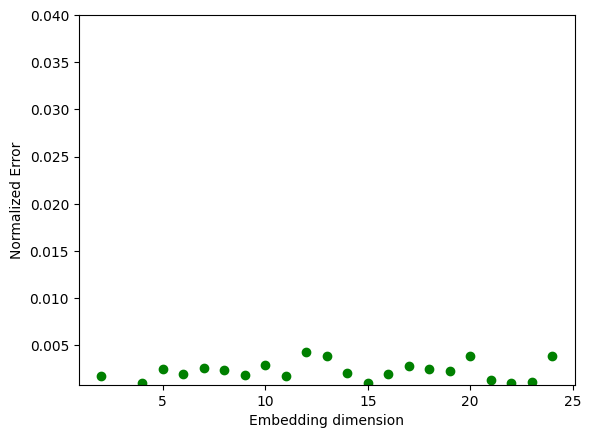

In [3]:
plt.scatter(ed, curvature_error_ed, color="green")
plt.ylim(top=0.04)
plt.xlabel("Embedding dimension")
plt.ylabel("Normalized Error");

## Evaluate error with respect to the noise variance

Text(0, 0.5, 'Normalized Error')

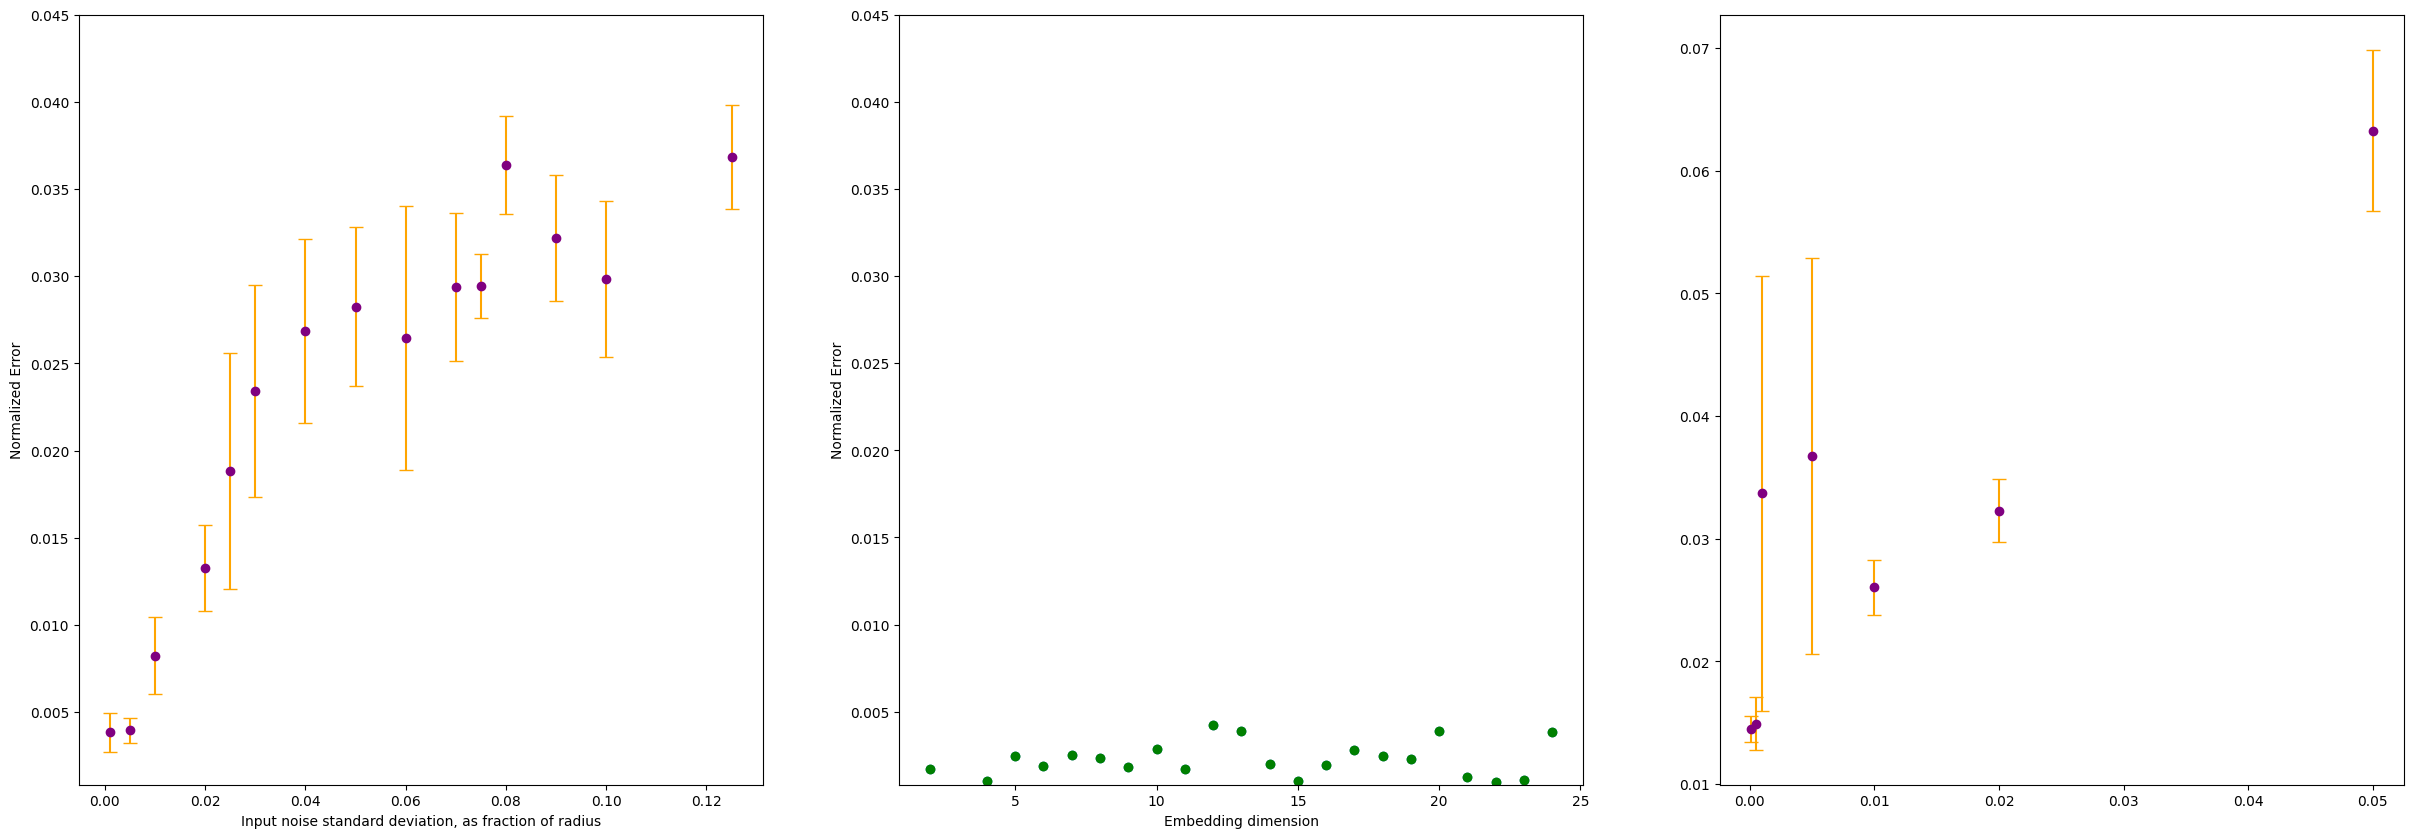

In [4]:
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(131)

noise_var = [
    0.001,
    0.005,
    0.01,
    0.02,
    0.025,
    0.03,
    0.04,
    0.05,
    0.06,
    0.07,
    0.075,
    0.08,
    0.09,
    0.1,
    0.125,
]


curvature_error_noise = [
    0.0038236,
    0.00393826,
    0.0082392,
    0.013263643,
    0.018831209,
    0.023393472,
    0.026830469,
    0.028257823,
    0.026462683,
    0.029377216,
    0.029433391,
    0.036400927,
    0.032171806,
    0.029818693,
    0.036835936,
]


std = [
    0.00255255,
    0.00162342,
    0.00494583,
    0.005526395,
    0.015162444,
    0.013581833,
    0.011809724,
    0.010161061,
    0.01691731,
    0.009538343,
    0.004111763,
    0.006278068,
    0.00807038,
    0.010022126,
    0.00662975,
]

std = std / np.sqrt(5)

ax.errorbar(
    x=noise_var,
    y=curvature_error_noise,
    yerr=std,
    fmt="o",
    ecolor="orange",
    capsize=5,
    color="purple",
)
plt.xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")
plt.ylim(top=0.045)

# plt.savefig("est_theory.svg")
noise_vars2 = [0.02, 0.05, 0.01, 0.005, 0.0005, 0.001, 0.0001]

curvature_errors_noise2 = [
    0.032287827,
    0.063259569,
    0.026015801,
    0.036729573,
    0.014929154,
    0.033680042,
    0.01449421,
]

stds2 = [
    0.00579972,
    0.014732794,
    0.005003834,
    0.036167766,
    0.004776713,
    0.039667175,
    0.002329629,
] / np.sqrt(5)

axs2 = fig.add_subplot(133)

axs2.errorbar(
    x=noise_vars2,
    y=curvature_errors_noise2,
    yerr=stds2,
    fmt="o",
    color="purple",
    ecolor="orange",
    capsize=5,
)


ax3 = fig.add_subplot(132)

ax3.scatter(ed, curvature_error_ed)

ax3.set_xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")


ax3.scatter(ed, curvature_error_ed, color="green")
plt.ylim(top=0.045)
plt.xlabel("Embedding dimension")
plt.ylabel("Normalized Error")


# plt.savefig("error.svg")